# Script 2 - Iowa Liquor Sales

In questo progetto sono stati raggiunti 2 obiettivi principali:

-Determinare la migliore contea dello Iowa in cui aprire un nuovo negozio di liquori

-Determinare quali fattori influenzano maggiormente le vendite in quella contea

# Import the libraries and Read CSV

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

raw_data = pd.read_csv("C:/Users/gigio/Downloads/Iowa_Liquor_Sales.csv", low_memory=False)


# Explore the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
raw_data.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-00020100009,08/29/2016,4256,Fareway Stores #912 / Sioux Center,115 1st Ave NW,Sioux Center,51250,POINT (-96.176959 43.078003),84.0,SIOUX,...,69636,Dr. Mcgillicuddy's Cherry Schnapps,12,750,8.66,12.99,6,12.99,4.50,1.18
1,INV-00067000040,08/31/2016,4588,Sam's Mini Mart / Sioux City,923 W 7TH ST,Sioux City,51103,POINT (-96.419074 42.503495),97.0,WOODBURY,...,43024,Admiral Nelson Spiced Rum,24,375,2.74,4.11,1,98.64,0.37,0.09
2,INV-00040000015,08/30/2016,4176,Todds On The Go,235 Edgewood Rd NE,Cedar Rapids,52405,NaN,57.0,LINN,...,11776,Black Velvet,12,750,5.23,7.85,1,94.20,0.75,0.19
3,INV-00030600017,08/30/2016,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 Blairs Ferry Road NE,Cedar Rapids,52402,POINT (-91.668909 42.034799),57.0,LINN,...,5061,Glenlivet 15 Year French Oak,6,750,32.48,48.72,3,48.72,2.25,0.59
4,S33682700006,08/01/2016,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726,POINT (-90.766126 41.509119),82.0,Scott,...,10549,Black Velvet Toasted Caramel Mini,10,600,7.12,10.68,1,10.68,0.60,0.16


In [5]:
raw_data.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
2709547,01/05/2015,4696,WEST DES MOINES,50266,77.0,Polk,1031200.0,VODKA FLAVORED,205,40192,New Amsterdam Pineapple,375,$3.50,$5.25,6,$31.50,2.25,0.59
2709548,01/05/2015,2590,CEDAR RAPIDS,52402,57.0,Linn,1012200.0,SCOTCH WHISKIES,260,5346,Johnnie Walker Red,750,$14.25,$21.38,4,$85.52,3.00,0.79
2709549,01/05/2015,3631,AUDUBON,50025,5.0,Audubon,1081330.0,PEACH SCHNAPPS,65,82847,Dekuyper Peachtree,1000,$7.62,$11.43,2,$22.86,2.00,0.53
2709550,01/05/2015,2517,NEWTON,50208,50.0,Jasper,1071100.0,AMERICAN COCKTAILS,395,58868,Jose Cuervo Authentic Strawberry Margarita,1750,$8.20,$12.30,6,$73.80,10.50,2.77
2709551,01/05/2015,2643,WATERLOO,50701,7.0,Black Hawk,1012200.0,SCOTCH WHISKIES,260,5329,Johnnie Walker Blue,750,$130.00,$195.00,1,$195.00,0.75,0.20


I dati contengono info sulle vendite all'ingrosso per le vendite di liquori dell'Iowa in date prestabilite dal 2010 a fine 2019. Si tratta di una serie di dati di osservazione basati sulle transazioni. Ogni osservazione è unica per l'alcol venduto e per la quantità a cui è stato venduto. In ogni osservazione sono incluse informazioni aggiuntive sull'ubicazione, sui venditori e sulle vendite.



In [4]:
# siccome il modello ha probelmi di memoria con tutti i dati, restringo il tutto al solo anno 2019. E' una prova, il file totale 
#è nella cartella To Luca

In [5]:
raw_data.shape

(20095649, 24)

In [4]:
raw_data.dropna(inplace=True)

In [7]:
raw_data.shape

(18075463, 24)

In [5]:
raw_data.isnull().sum()

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [6]:
raw_data.duplicated().sum()

0

In [11]:
# raw_data[raw_data.duplicated()]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
3861,03/31/2016,4829,DES MOINES,50314,77.0,Polk,1032200.0,IMPORTED VODKA - MISC,65,34395,Effen Cucumber,750,$14.17,$21.26,6,$127.56,4.50,1.19
4790,03/31/2016,5101,WATERLOO,50701,7.0,Black Hawk,1052010.0,IMPORTED GRAPE BRANDIES,420,48105,Hennessy VS,375,$9.99,$14.99,12,$179.88,4.50,1.19
10540,03/30/2016,2178,WAUKON,52172,3.0,Allamakee,1081317.0,GRAPE SCHNAPPS,65,82636,Dekuyper Grape Pucker Schnapps,750,$6.30,$9.45,1,$9.45,0.75,0.20
13202,03/30/2016,2285,IOWA CITY,52240,52.0,Johnson,1041100.0,AMERICAN DRY GINS,370,32236,Seagrams Extra Dry Gin,750,$6.49,$9.74,12,$116.88,9.00,2.38
13264,03/30/2016,3773,CEDAR RAPIDS,52401,57.0,Linn,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,389,64776,Cointreau Liqueur,750,$19.99,$29.99,12,$359.88,9.00,2.38
16034,03/30/2016,4973,WEST UNION,52175,33.0,Fayette,1012100.0,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,$18.75,$28.13,2,$56.26,2.00,0.53
16976,03/30/2016,2285,IOWA CITY,52240,52.0,Johnson,1032080.0,IMPORTED VODKA,260,34457,Ketel One Imported Vodka,1000,$16.50,$24.75,12,$297.00,12.00,3.17
16991,03/30/2016,2285,IOWA CITY,52240,52.0,Johnson,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,35,66836,St. Germain,750,$20.00,$30.00,6,$180.00,4.50,1.19
19925,03/29/2016,4106,DUBUQUE,52002,31.0,Dubuque,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,$9.25,$13.88,3,$41.64,3.00,0.79
22080,03/29/2016,4106,DUBUQUE,52002,31.0,Dubuque,1011200.0,STRAIGHT BOURBON WHISKIES,65,19064,Jim Beam,375,$5.25,$7.88,3,$23.64,1.12,0.30


In [12]:
# raw_data.drop_duplicates()  

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.50,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.00,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.50,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.60,2.54
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,$23.00,$34.50,1,$34.50,0.75,0.20
6,03/31/2016,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69636,Dr. Mcgillicuddy's Cherry Schnapps,750,$8.67,$13.01,4,$52.04,3.00,0.79
7,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88294,Patron Silver Tequila,375,$14.00,$21.00,12,$252.00,4.50,1.19
8,03/31/2016,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,259,52318,Christian Bros Brandy,1750,$11.83,$17.75,6,$106.50,10.50,2.77
9,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,389,49185,Remy Martin Vsop (flask),375,$10.66,$15.99,12,$191.88,4.50,1.19
10,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88296,Patron Tequila Silver,750,$27.00,$40.50,12,$486.00,9.00,2.38


In [7]:
raw_data.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [6]:
#ETL sulla data, divido nel formato desiderato e creo due colonne: mese ed anno
raw_data.Date = pd.to_datetime(raw_data["Date"], format = "%m/%d/%Y")
raw_data['month'] = raw_data.Date.dt.month
raw_data['year'] = raw_data.Date.dt.year

In [7]:
raw_data['Vendor Number'] = raw_data['Vendor Number'].astype(str)
raw_data['Store Number'] = raw_data['Store Number'].astype(str)

In [8]:
raw_data['County'] = raw_data['County'].str.upper()

In [9]:
raw_data.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'month', 'year'],
      dtype='object')

In [9]:
raw_data_19 = raw_data[raw_data['year'] == 2019]

In [11]:
raw_data_19.shape

(2158261, 26)

In [11]:
raw_data["Zip Code"].value_counts()

52402    471046
50010    384961
52240    384236
50613    369741
51501    352470
          ...  
52134       171
50471       148
52362       120
51463        30
51230        10
Name: Zip Code, Length: 482, dtype: int64

In [10]:
raw_data['City']=raw_data['City'].str.upper()
raw_data["City"].value_counts(dropna=False)

DES MOINES        1590509
CEDAR RAPIDS      1240240
DAVENPORT          730367
SIOUX CITY         569619
COUNCIL BLUFFS     560861
                   ...   
RUDD                  148
EARLING               147
WYOMING               120
TEMPLETON              30
ALVORD                 10
Name: City, Length: 446, dtype: int64

In [11]:
raw_data['County']=raw_data['County'].str.upper()
raw_data["County"].value_counts(dropna=False)

POLK          3192686
LINN          1494121
SCOTT         1087464
BLACK HAWK    1004627
JOHNSON        940358
               ...   
ADAMS           15213
DAVIS           15166
RINGGOLD        13799
LUCAS            4338
FREMONT          2566
Name: County, Length: 103, dtype: int64

In [12]:
raw_data["County Number"].value_counts(dropna=False)

77.0    3192686
57.0    1494121
82.0    1087464
7.0     1004627
52.0     940358
         ...   
2.0       15213
26.0      15166
80.0      13799
59.0       4338
36.0       2566
Name: County Number, Length: 99, dtype: int64

Per i nostri dati di localizzazione, possiamo vedere che ci sono 99 numeri di contea, 99 contee, 446 città e 482 codici di avviamento postale. 

I risultati sopra mostrano una rapida ripartizione dei dati a livello di contea. Siamo più interessati però alle vendite medie in ogni contea e al numero di vendite in quella contea. 


In [ ]:
pop_counties = raw_data_19['County'].value_counts()
pop_counties

In [13]:

pop_counties = raw_data_19 ['County'].value_counts()
pop_counties

POLK          383948
LINN          178470
SCOTT         126225
BLACK HAWK    125434
JOHNSON       114391
               ...  
RINGGOLD        1687
WAYNE           1457
ADAMS           1114
LUCAS            646
FREMONT          411
Name: County, Length: 99, dtype: int64

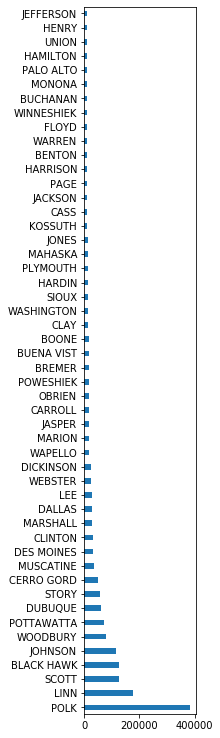

In [14]:
#grafico le 50 contee 
pop_counties.head(50).plot(kind='barh', width=0.4,  figsize=(2,13));

Vediamo che un gran numero di osservazioni si trovano nella contea di Polk. Questo perché è un principale centro urbano dello stato dell'Iowa e un numero maggiore di persone dovrebbe essere correlato positivamente con un numero maggiore di vendite di liquori. 


# Mine the data



In [15]:
#continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]
dummy_df = pd.get_dummies(raw_data_19.County) #drop_first=True)
dummy_df.head()

,ADAIR,ADAMS,ALLAMAKEE,APPANOOSE,AUDUBON,BENTON,BLACK HAWK,BOONE,BREMER,BUCHANAN,...,WAPELLO,WARREN,WASHINGTON,WAYNE,WEBSTER,WINNEBAGO,WINNESHIEK,WOODBURY,WORTH,WRIGHT
886836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
896194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
903678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
906924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#creo un dataset più piccolo con le variabili di interesse
info_table= raw_data_19[['State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)']]

In [17]:
location_df = pd.concat([info_table, dummy_df], axis=1) #SE Runno sopra, concateno info_table e dummy_df. prima avevo raw_short, senza fare info table
location_df.head()


,State Bottle Retail,Bottles Sold,Sale (Dollars),ADAIR,ADAMS,ALLAMAKEE,APPANOOSE,AUDUBON,BENTON,BLACK HAWK,...,WAPELLO,WARREN,WASHINGTON,WAYNE,WEBSTER,WINNEBAGO,WINNESHIEK,WOODBURY,WORTH,WRIGHT
886836,11.51,2,23.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
896194,23.61,1,23.61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
903678,12.38,4,49.52,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
906924,15.50,3,46.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915910,10.38,12,124.56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# location_df.drop([['Invoice/Item Number','Store Name', 'Store Location', 'Vendor Name', 'Pack' ]])
# location_df.head()

La tabella sopra fornisce tutte le informazioni per la prima regressione.


# Refine the data 

Cerchiamo eventuali relazioni statistiche, correlazioni o altre proprietà rilevanti del set di dati.

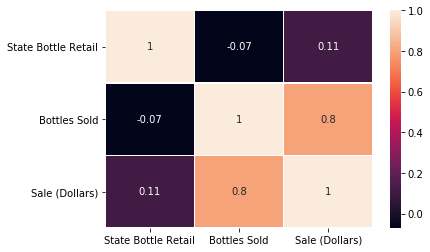

In [17]:
# import seaborn.linearmodels as sblm
sns.heatmap(info_table.corr(), annot = True, linewidths = 0.5)


Con la mappa di calore sopra, possiamo vedere una forte correlazione positiva tra il numero di bottiglie vendute e la nostra variabile di vendita. Ciò significa che dovrebbe essere un buon previsore della quantità di vendite. La vendita al dettaglio di bottiglie, che è fondamentale il prezzo per bottiglia, ha a malapena alcuna correlazione con le vendite. Nel complesso, manterremo tutte e tre le variabili nella regressione (insieme alle numerose variabili fittizie della contea).

# Build the model


#### First model

Useremo il modello seguente per determinare quale contea ha le vendite previste più elevate.

In [18]:
import statsmodels.api as sm

In [23]:
raw_shor=raw_data_19[['State Bottle Retail', 'Bottles Sold']]
raw_shor = sm.add_constant(raw_shor)
raw_shor.shape

(2158261, 3)

In [21]:
y = location_df['Sale (Dollars)']
y.shape

(2158261,)

In [25]:
model = sm.OLS(y, raw_shor).fit() 
predictions = model.predict(raw_shor)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 2.220e+06
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:29   Log-Likelihood:            -1.5259e+07
No. Observations:             2158261   AIC:                         3.052e+07
Df Residuals:                 2158258   BIC:                         3.052e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -98.8825      0.315   -313.630      0.000     -99.500     -98.265
State Bottle Retail     6.6220      0.015    439.281      0.000       6.592       6.652
Bottles Sold           12.6463      0.006   2086.326      0.000      12.634      12.658
==============================================================================
Omnibus:                  3728111.778   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     134476975243.687
Skew:                          10.766   Prob(JB):                         0.00
Kurtosis:                    1225.673   Cond. No.                         56.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ciò dimostra che sia la vendita al dettaglio di bottiglie statali che le bottiglie vendute sono fattori statisticamente significativi nel determinare le vendite per una determinata posizione. Se il prezzo per bottiglia aumenta di $ 1, a parità di altre condizioni, le vendite aumenteranno di 6,62 dollari. Se il numero di bottiglie vendute aumenta di 1 bottiglia, a parità di altre condizioni, le vendite aumenteranno di 12,64 dollari.

In [26]:
dummy = dummy_df.copy(deep=True)
dummy = dummy.drop('POLK', axis=1)
dummy = sm.add_constant(dummy)
dummy.shape


(2158261, 99)

In [23]:
models_dm = sm.OLS(y, dummy).fit() 
predictions = models_dm.predict(dummy)
models_dm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     117.8
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:26:49   Log-Likelihood:            -1.6459e+07
No. Observations:             2158261   AIC:                         3.292e+07
Df Residuals:                 2158162   BIC:                         3.292e+07
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.9713      0.801    243.408      0.000     193.401     196.541
ADAIR       -102.5230      7.377    -13.898      0.000    -116.981     -88.065
ADAMS       -118.8901     14.892     -7.983      0.000    -148.078     -89.702
ALLAMAKEE    -99.3401      6.528    -15.219      0.000    -112.134     -86.546
APPANOOSE    -58.4280      5.636    -10.367      0.000     -69.474     -47.381
AUDUBON     -127.8492      9.280    -13.777      0.000    -146.038    -109.661
BENTON      -105.5883      4.844    -21.799      0.000    -115.082     -96.095
BLACK HAWK   -50.9853      1.614    -31.586      0.000     -54.149     -47.822
BOONE        -65.2536      3.947    -16.534      0.000     -72.989     -57.518
BREMER       -74.9431      3.893    -19.251      0.000     -82.573     -67.313
BUCHANAN     -79.5769      4.923    -16.164      0.000     -89.226     -69.928
BUENA VIST   -78.7435      3.928    -20.046      0.000     -86.443     -71.044
BUTLER      -104.0919      7.613    -13.673      0.000    -119.013     -89.171
CALHOUN      -77.3811      8.915     -8.680      0.000     -94.854     -59.909
CARROLL      -36.7197      3.853     -9.531      0.000     -44.270     -29.169
CASS         -73.9624      4.595    -16.097      0.000     -82.968     -64.957
CEDAR       -121.2456      5.206    -23.289      0.000    -131.450    -111.042
CERRO GORD   -57.5744      2.336    -24.644      0.000     -62.153     -52.995
CHEROKEE     -92.6554      5.791    -15.999      0.000    -104.006     -81.304
CHICKASAW    -41.8549      8.441     -4.959      0.000     -58.399     -25.311
CLARKE       -74.6747      6.293    -11.867      0.000     -87.008     -62.342
CLAY         -80.9796      4.018    -20.153      0.000     -88.855     -73.104
CLAYTON     -117.8387      5.256    -22.421      0.000    -128.140    -107.538
CLINTON      -52.4872      2.927    -17.933      0.000     -58.224     -46.751
CRAWFORD     -17.8811      5.552     -3.221      0.001     -28.763      -7.000
DALLAS        67.9295      3.051     22.263      0.000      61.949      73.910
DAVIS       -119.5299     11.885    -10.057      0.000    -142.824     -96.236
DECATUR     -103.8218     11.138     -9.321      0.000    -125.652     -81.991
DELAWARE     -57.5073      6.418     -8.961      0.000     -70.086     -44.929
DES MOINES   -86.4903      2.811    -30.772      0.000     -91.999     -80.982
DICKINSON    -31.8851      3.302     -9.655      0.000     -38.358     -25.412
DUBUQUE      -63.0482      2.170    -29.048      0.000     -67.302     -58.794
EMMET        -81.0281      6.260    -12.944      0.000     -93.297     -68.759
FAYETTE      -65.5570      5.346    -12.262      0.000     -76.036     -55.078
FLOYD        -70.5528      4.916    -14.352      0.000     -80.188     -60.918
FRANKLIN    -114.6129      5.916    -19.375      0.000    -126.207    -103.019
FR



Questa regressione mostra che i parametri di posizione da soli non fanno un ottimo lavoro nell'adattare i nostri dati di vendita. L'R-squared ci dice che ben poco della variabilità delle vendite è spiegata dai parametri di localizzazione.

In [20]:
X = location_df.copy(deep=True)
X = X.drop('Sale (Dollars)', axis=1)
X = X.drop('POLK', axis=1)
X = sm.add_constant(X)
X.shape

(2158261, 101)

In [28]:
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 4.447e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:43:45   Log-Likelihood:            -1.5258e+07
No. Observations:             2158261   AIC:                         3.052e+07
Df Residuals:                 2158160   BIC:                         3.052e+07
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -94.4650      0.530   -178.145      0.000     -95.504     -93.426
State Bottle Retail     6.6008      0.015    437.289      0.000       6.571       6.630
Bottles Sold           12.6438      0.006   2080.184      0.000      12.632      12.656
ADAIR                  -1.9736      4.228     -0.467      0.641     -10.261       6.314
ADAMS                  -5.6538      8.536     -0.662      0.508     -22.383      11.076
ALLAMAKEE               0.5431      3.742      0.145      0.885      -6.790       7.877
APPANOOSE               0.0322      3.230      0.010      0.992      -6.299       6.364
AUDUBON                -3.0187      5.319     -0.568      0.570     -13.444       7.407
BENTON                 -6.7926      2.777     -2.446      0.014     -12.235      -1.350
BLACK HAWK            -14.2832      0.926    -15.432      0.000     -16.097     -12.469
BOONE                  -5.6279      2.262     -2.488      0.013     -10.062      -1.194
BREMER                 -0.5867      2.232     -0.263      0.793      -4.960       3.787
BUCHANAN                1.3507      2.822      0.479      0.632      -4.181       6.882
BUENA VIST             -5.0820      2.252     -2.257      0.024      -9.495      -0.669
BUTLER                 -2.7690      4.364     -0.635      0.526     -11.322       5.784
CALHOUN                -2.9214      5.110     -0.572      0.568     -12.936       7.093
CARROLL                16.6545      2.208      7.542      0.000      12.326      20.983
CASS                    2.6686      2.634      1.013      0.311      -2.494       7.831
CEDAR                   0.5674      2.985      0.190      0.849      -5.283       6.417
CERRO GORD             -9.3704      1.339     -6.997      0.000     -11.995      -6.745
CHEROKEE              -16.0073      3.320     -4.822      0.000     -22.514      -9.501
CHICKASAW              14.9764      4.838      3.096      0.002       5.494      24.459
CLARKE                  2.7030      3.607      0.749      0.454      -4.366       9.772
CLAY                    0.9739      2.303      0.423      0.672      -3.541       5.488
CLAYTON                -6.7894      3.013     -2.253      0.024     -12.695      -0.884
CLINTON                -7.5094      1.678     -4.476      0.000     -10.798      -4.221
CRAWFORD               11.1156      3.182      3.493      0.000       4.879      17.352
DALLAS                 49.9897      1.749     28.585      0.000      46.562      53.417
DAVIS                  -0.5106      6.812     -0.075      0.940     -13.862      12.841
DECATUR                -8.2090      6.384     -1.286      0.198     -20.722       4.304
DELAWARE                1.3399      3.678      0.364      0.716      -5.870       8.549
DES MOINES             -4.9930      1.612     -3.098      0.002      -8.152      -1.834
DIC

MSE: 3598447518.2562685


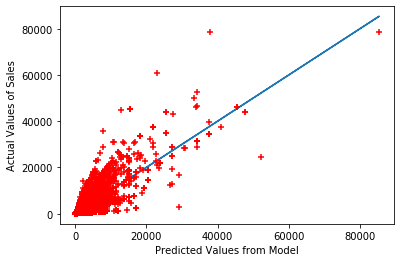

In [29]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Model")
plt.ylabel("Actual Values of Sales")
plt.plot(predictions, np.poly1d(np.polyfit(predictions, y, 1))(predictions))
print("MSE:", model.mse_model)

Prima conclusione (apertura nuovi negozi):

Vediamo che sia le bottiglie vendute che la vendita statale al dettaglio rimangono statisticamente significative quando aggiungiamo i parametri di localizzazione al nostro modello. Questo modello è tutto relativo a Polk County perché abbiamo escluso una variabile  nostra regressione. La contea che ha il coefficiente beta più alto è la contea di Dallas. Anche la variabile per la contea di Dallas è statisticamente significativa. Sulla base di questa regressione, potremmo dire che l'apertura di un negozio di liquori nella contea di Dallas potrebbe potenzialmente portare a più vendite rispetto all'apertura di un negozio di liquori in altre contee.

Nel complesso, dovremo trovare un modo per ridurre al minimo il MSE.

In [19]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1510782, 101) (1510782,)
(647479, 101) (647479,)


In [23]:
lm = linear_model.LinearRegression()
model_sk = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [38]:
#aggiunte 
from sklearn.metrics import mean_squared_error

Text(0, 0.5, 'Predicted')

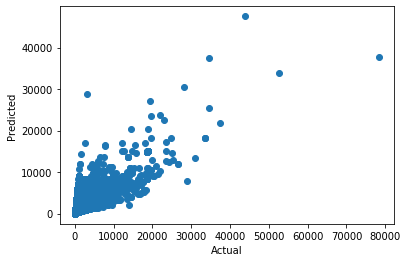

In [25]:
#aggiunta da run

plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [26]:
print("Score : ", model_sk.score(X_test,y_test))

Score :  0.6683921980727632


#### K-Folds Cross-Validation

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [41]:
# Perform 5-fold cross validation

scores = cross_val_score(model_sk, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [0.67672356 0.67145559 0.65857854 0.69464594 0.64778159]
Average:  0.6698370434972287


Cross-Predicted Accuracy: 0.6714866253633374


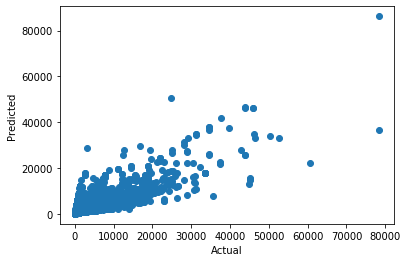

In [42]:
predictions = cross_val_predict(model_sk, X, y, cv=5)
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

### Lasso regression

Per prima cosa sceglieremo il parametro di regolazione lambda / alfa ottimale. Quindi regolarizzeremo con una regressione lasso. I coefficienti beta rimanenti alla fine della regolarizzazione sono i più importanti.

In [43]:
# Select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=9)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

0.0003213258548369306

In [49]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0003, normalize=True)
lassoreg.fit(X_train, y_train)
lassor = lassoreg.coef_
lassor

array([  0.        ,   6.86905665,  12.48733965,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,  -9.09020968,  -0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        15.56012048,   0.13172615,   0.        ,  -4.16616388,
        -7.24931444,   9.26597376,   0.        ,   0.25857854,
        -0.        ,  -0.12217995,   5.10584639,  51.38896579,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         4.46556845,   0.        ,   1.19155445,  -7.58671215,
        -0.        ,  -0.        ,  -3.43311961,   0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -4.02805038,   3.93896886,
         6.40583109,   0.        ,  -9.7257443 ,   1.40000034,
        -9.35369759,   0.        ,   9.6538705 ,   0.        ,
         0.        ,  -0.        ,   0.90935198,  -6.23474234,
        -2.84071558,  -0.        ,  -9.18729658,  -0.  

In [50]:
labeled = zip(X.columns, lassor)


In [51]:
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

288.04424583712137


Il nostro errore quadratico medio è diminuito drasticamente. Originariamente era altissimo con stime OLS. Con la regolarizzazione scende a circa 270.

#### Second Model

Addestreremo un ulteriore modello di regressione per determinare quali fattori influenzano le vendite nella contea di Dallas, e in che modo.

In [15]:
raw_data_19.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year
886836,INV-16840300172,2019-01-09,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97.0,WOODBURY,...,12,1000,7.67,11.51,2,23.02,2.00,0.52,1,2019
896194,INV-16839800075,2019-01-09,2594,Hy-Vee Food Store / Sioux City,4500 Sergeant Road,Sioux City,51106,POINT (-96.346969 42.447396),97.0,WOODBURY,...,12,750,15.74,23.61,1,23.61,0.75,0.19,1,2019
903678,INV-16840300157,2019-01-09,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97.0,WOODBURY,...,12,750,8.25,12.38,4,49.52,3.00,0.79,1,2019
906924,INV-16839300007,2019-01-09,4655,Casey's General Store #2237 / Prairie City,1002 W 2nd St,Prairie City,50228,POINT (-93.247591 41.596714),50.0,JASPER,...,12,750,10.33,15.50,3,46.50,2.25,0.59,1,2019
915910,INV-16836900016,2019-01-09,3949,Wal-Mart 0751 / Pella,1650 Washington St,Pella,50219,POINT (-92.933676 41.410379),63.0,MARION,...,6,1750,6.92,10.38,12,124.56,21.00,5.54,1,2019


In [27]:
dallas_co = raw_data_19.copy(deep=True)
dallas_county = dallas_co.drop(dallas_co[dallas_co['County'] != 'DALLAS'].index, axis=0)
dallas_county.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year
965201,INV-16763900025,2019-01-04,5384,Casey's General Store # 2698/ Perry,1308 1st Street,Perry,50220,POINT (-94.196008 41.595366),25.0,DALLAS,...,24,375,1.80,2.70,24,64.80,9.0,2.37,1,2019
965396,INV-16763700014,2019-01-04,2612,Hy-Vee Store / Perry,1215 141 St,Perry,50220,POINT (-94.104501 41.830292),25.0,DALLAS,...,6,1750,6.92,10.38,6,62.28,10.5,2.77,1,2019
965435,INV-16690500013,2019-01-02,2665,Hy-Vee / Waukee,1005 E Hickman Rd,Waukee,50263,POINT (-93.854477 41.615059),25.0,DALLAS,...,12,750,5.48,8.22,12,98.64,9.0,2.37,1,2019
965525,INV-16764200023,2019-01-04,5411,Bluejay Market,2810 Wills Ave,Perry,50220,POINT (-94.081127 41.838488),25.0,DALLAS,...,12,500,4.95,7.43,1,7.43,0.5,0.13,1,2019
965618,INV-16733100002,2019-01-04,4873,Casey's General Store #2559 / Granger,"1802, Sycamore St",Granger,50109,POINT (-93.824366 41.758781),25.0,DALLAS,...,12,750,6.75,10.13,6,60.78,4.5,1.18,1,2019


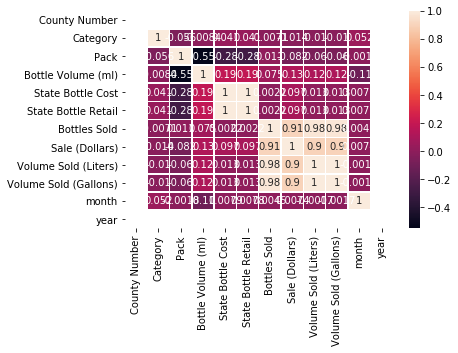

In [38]:
sns.heatmap(dallas_county.corr(), annot = True, linewidths = 0.5)

Possiamo vedere che il volume venduto e le bottiglie vendute hanno correlazioni con le vendite. Queste, quindi sarebbero buone variabili da includere nel nostro modello. Il prezzo al dettaglio (State bottle reatail) ha anche una leggera correlazione, quindi possiamo includere anche questa variabile. Il resto delle nostre variabili ha scarso effetto sulle vendita, quindi non ha senso includerle.

In [28]:
dallas_short = dallas_county[['State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)']]

In [29]:
dallas_short.head()

,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
965201,2.70,24,64.80,9.0
965396,10.38,6,62.28,10.5
965435,8.22,12,98.64,9.0
965525,7.43,1,7.43,0.5
965618,10.13,6,60.78,4.5


In [30]:
y = dallas_short['Sale (Dollars)']
y.shape

(28420,)

In [31]:
X = dallas_short.copy(deep=True)
X = X.drop('Sale (Dollars)', axis=1)
X = sm.add_constant(X)
X.shape

(28420, 4)

In [57]:
model_dallas = sm.OLS(y, X).fit() 
predictionss = model_dallas.predict(X)
model_dallas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 4.723e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:57:21   Log-Likelihood:            -2.2008e+05
No. Observations:               28420   AIC:                         4.402e+05
Df Residuals:                   28416   BIC:                         4.402e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -46.4402      4.525    -10.264      0.000     -55.309     -37.572
State Bottle Retail      6.5816      0.172     38.227      0.000       6.244       6.919
Bottles Sold            10.4436      0.179     58.397      0.000      10.093      10.794
Volume Sold (Liters)     2.1212      0.106     20.081      0.000       1.914       2.328
==============================================================================
Omnibus:                    38831.372   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         70139552.765
Skew:                           7.136   Prob(JB):                         0.00
Kurtosis:                     245.956   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

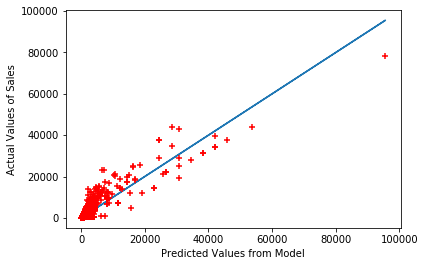

MSE: 3598447518.2562685


In [44]:
plt.scatter(predictionss, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Model")
plt.ylabel("Actual Values of Sales")
plt.plot(predictionss, np.poly1d(np.polyfit(predictionss, y, 1))(predictionss))
plt.show()
print("MSE:", model.mse_model)

Seconda conclusione

Vediamo che tutte e tre le variabili che abbiamo scelto, Volume venduto (litri), Bottiglie vendute e Prezzo al dettaglio sono tutte statisticamente significative. Ciò dimostra che hanno tutti un effetto significativo sulle vendite.

In [ ]:
#testiamo il modello

In [32]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X, y, test_size=0.3)
print(Xd_train.shape, yd_train.shape)

(19894, 4) (19894,)


In [33]:
lm = linear_model.LinearRegression()
modeld_sk = lm.fit(Xd_train, yd_train)
predictions = lm.predict(Xd_test)

In [60]:
scores = cross_val_score(modeld_sk, Xd_train, yd_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [0.80484104 0.75207967 0.88032112 0.67421331 0.79703831 0.77024031
 0.78904498 0.77441628 0.83421582 0.87892469]
Average:  0.7955335521227316


Cross-Predicted Accuracy: 0.818079219296339


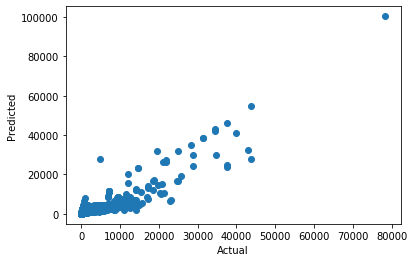

In [61]:
predictions = cross_val_predict(modeld_sk, X, y, cv=10)
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

In [62]:
# select the best alpha with LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=9)
lassoregcv.fit(Xd_train, yd_train)
lassoregcv.alpha_

0.389553566645013

In [63]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.38, normalize=True)
lassoreg.fit(Xd_train, yd_train)
lassord = lassoreg.coef_
lassord
#0.38
#0.091

array([ 0.        ,  3.32736994, 11.59821513,  1.40061334])

In [64]:
yd_pred = lassoreg.predict(Xd_test)
print(np.sqrt(metrics.mean_squared_error(yd_test, yd_pred)))

576.7160820578121


In [65]:
print(X.columns)
print(lassord)

Index(['const', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Liters)'], dtype='object')
[ 0.          3.32736994 11.59821513  1.40061334]


COEFF:
State Bottle Retail = 3.27
Bottles Sold = 11.59
Volume Sold (Liters) = 1.40


Conclusioni :

Usando una regressione lasso, abbiamo un MSE molto più piccolo. Vediamo anche che la variabile Bottiglie Vendute (Bottle Sold) ha l'effetto maggiore sulle vendite nella contea di Dallas. Pertanto, troveremo i negozi della contea che hanno il maggior numero di bottiglie vendute per capire quali tipi di bottiglie vengono vendute maggiormente. Quindi, se dovessimo fare una raccomandazione all'apertura di un negozio nella contea di Dallas, sarebbe che massimizzare il numero di bottiglie vendute è il modo principale per aumentare le vendite.

Ora, raffinando ancora meglio le analisi, si individuano gli store number che hanno massimizzato le bottiglie vendute

In [64]:
df_dal = dallas_county.copy(deep=True)
df_dal = df_dal.drop('Date', axis=1)  
df_dal = df_dal.drop('City', axis=1)  
df_dal = df_dal.drop('Zip Code', axis=1)  
df_dal = df_dal.drop('County Number', axis=1)  
df_dal = df_dal.drop('County', axis=1)  
df_dal = df_dal.drop('Category', axis=1)   
df_dal = df_dal.drop('Vendor Number', axis=1)  
df_dal = df_dal.drop('Item Number', axis=1)  
df_dal = df_dal.drop('Item Description', axis=1)  
df_dal = df_dal.drop('Bottle Volume (ml)', axis=1)  
df_dal = df_dal.drop('State Bottle Cost', axis=1)  
df_dal = df_dal.drop('Volume Sold (Gallons)', axis=1)  
df_dal.head()

,Invoice/Item Number,Store Number,Store Name,Address,Store Location,Category Name,Vendor Name,Pack,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),month,year
965201,INV-16763900025,5384,Casey's General Store # 2698/ Perry,1308 1st Street,POINT (-94.196008 41.595366),American Vodkas,McCormick Distilling Co.,24,2.70,24,64.80,9.0,1,2019
965396,INV-16763700014,2612,Hy-Vee Store / Perry,1215 141 St,POINT (-94.104501 41.830292),American Vodkas,SAZERAC NORTH AMERICA,6,10.38,6,62.28,10.5,1,2019
965435,INV-16690500013,2665,Hy-Vee / Waukee,1005 E Hickman Rd,POINT (-93.854477 41.615059),American Brandies,LUXCO INC,12,8.22,12,98.64,9.0,1,2019
965525,INV-16764200023,5411,Bluejay Market,2810 Wills Ave,POINT (-94.081127 41.838488),Flavored Rum,PERNOD RICARD USA,12,7.43,1,7.43,0.5,1,2019
965618,INV-16733100002,4873,Casey's General Store #2559 / Granger,"1802, Sycamore St",POINT (-93.824366 41.758781),Canadian Whiskies,CONSTELLATION BRANDS INC,12,10.13,6,60.78,4.5,1,2019


In [65]:
#df.groupby('Zip Code')['Sale (Dollars)'].sum().sort_values(ascending=False)
df_dal.groupby('Store Number')['Bottles Sold'].sum().sort_values(ascending=False)

Store Number
2665    147846
3814    146246
4678     26860
2612     18835
4137     11881
4320      8875
4384      8201
5411      7223
4411      6271
4378      5953
4868      5463
5384      4652
5235      4596
4359      4362
4873      4312
4792      3545
4577      3374
4929      3234
5699      3150
5545      2758
5562      2705
5521      2602
5467      2544
4623      2260
5409      2228
5723      2123
2688      1853
5844      1135
5809      1047
5843       143
Name: Bottles Sold, dtype: int64

Come possiamo vedere sopra, il negozio con il maggior numero di bottiglie vendute a Dallas County è il negozio 2665. Maggiori informazioni su questo negozio e su alcuni altri negozi sarebbero molto utili. 

Info sui primi 5 negozi
Store number --> 2665 - 3814 - 4678 - 2612      

In [66]:
primo_storenum=df_dal['Store Number'] == '2665'
primostore=df_dal[primo_storenum]
primostore['Category Name'].value_counts()

American Vodkas                        1106
Straight Bourbon Whiskies               677
Canadian Whiskies                       574
American Flavored Vodka                 481
Cocktails /RTD                          455
Whiskey Liqueur                         377
Imported Cordials & Liqueurs            372
Imported Vodkas                         370
Imported Flavored Vodka                 362
100% Agave Tequila                      360
Flavored Rum                            275
American Schnapps                       269
Spiced Rum                              268
Cream Liqueurs                          266
Blended Whiskies                        253
American Cordials & Liqueur             236
Single Malt Scotch                      225
Scotch Whiskies                         216
White Rum                               201
Tennessee Whiskies                      199
Imported Dry Gins                       184
American Dry Gins                       171
Temporary & Specialty Packages  

In [67]:
sec_storenum=df_dal['Store Number'] == '3814'
secstore=df_dal[sec_storenum]
secstore['Category Name'].value_counts()

Straight Bourbon Whiskies         223
American Vodkas                    90
Canadian Whiskies                  74
Scotch Whiskies                    72
Single Malt Scotch                 51
100% Agave Tequila                 45
Spiced Rum                         34
Imported Brandies                  32
Imported Cordials & Liqueurs       31
Irish Whiskies                     30
Straight Rye Whiskies              30
Imported Dry Gins                  29
Mixto Tequila                      28
Blended Whiskies                   22
White Rum                          22
Imported Vodkas                    21
Tennessee Whiskies                 16
Whiskey Liqueur                    11
Cocktails /RTD                     11
Cream Liqueurs                     10
Imported Vodka                      5
American Dry Gins                   3
Single Barrel Bourbon Whiskies      2
Special Order Items                 1
Temporary & Specialty Packages      1
Flavored Rum                        1
Name: Catego

In [68]:
terzo_storenum=df_dal['Store Number'] == '4678'
terzostore=df_dal[terzo_storenum]
terzostore['Category Name'].value_counts()

American Vodkas                        197
Canadian Whiskies                      176
Straight Bourbon Whiskies              115
Cocktails /RTD                         112
Spiced Rum                              84
American Flavored Vodka                 78
Whiskey Liqueur                         73
Flavored Rum                            59
Blended Whiskies                        57
American Schnapps                       50
Cream Liqueurs                          46
White Rum                               41
Temporary & Specialty Packages          40
American Dry Gins                       38
Imported Flavored Vodka                 37
American Cordials & Liqueur             35
Scotch Whiskies                         34
100% Agave Tequila                      34
American Brandies                       30
Tennessee Whiskies                      30
Mixto Tequila                           26
Imported Vodkas                         25
Imported Schnapps                       23
Gold Rum   

In [69]:
quarto_storenum=df_dal['Store Number'] == '2612'
quartostore=df_dal[quarto_storenum]
quartostore['Category Name'].value_counts()

American Vodkas                        483
American Flavored Vodka                323
Canadian Whiskies                      248
Straight Bourbon Whiskies              185
Spiced Rum                             160
Flavored Rum                           155
American Schnapps                      148
100% Agave Tequila                     127
Imported Vodkas                        120
Blended Whiskies                       114
Cocktails /RTD                         114
Whiskey Liqueur                        104
Mixto Tequila                          102
Cream Liqueurs                          79
White Rum                               67
Imported Cordials & Liqueurs            65
American Cordials & Liqueur             63
American Brandies                       61
American Dry Gins                       56
Scotch Whiskies                         52
Tennessee Whiskies                      48
Irish Whiskies                          46
Imported Dry Gins                       43
Coffee Liqu